<a href="https://colab.research.google.com/github/Aquino0/Aquino0/blob/main/Machine_Learning_MVP_Cristopher_Aquino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Machine Learning MVP - Cristopher Aquino

Este modelo de machine learning visa prever se um aluno será Aprovado (1) ou Reprovado (0)
com base em características e comportamentos acadêmicos.

**Variáveis de Entrada:**
O modelo utiliza as seguintes variáveis: idade, gênero, etnia, nível de educação dos pais,
horas de estudo semanais, número de faltas, participação em aulas de reforço, apoio dos pais,
atividades extracurriculares, esportes, música e voluntariado.

**Funcionamento:**
Baseado em um classificador Support Vector Machine (SVM), o modelo foi treinado em um conjunto
de dados rotulado e otimizado com escalonamento de dados e ajuste de hiperparâmetros.

**Interpretação:**
Um valor de 1 indica uma previsão de possível Aprovação, enquanto um valor de 0 indica uma possível Reprovação.

**Uso:**
Este modelo pode ser aplicado em contextos educacionais para identificar áreas de risco no desempenho
acadêmico, permitindo intervenções direcionadas para estudantes em risco de baixo desempenho.

# 1. Bibliotecas

Importamos bibliotecas para manipulação de dados, machine learning e visualização.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# 2. Dataset

Upload dos arquivos e leitura dos dados

Vamos carregar os arquivos `.csv` para o ambiente do Colab:
- `dados_treinamento.csv` (treino)
- `X_test.csv` (features de teste)
- `y_test.csv` (labels de teste)


In [3]:
# Lendo os arquivos
df_train = pd.read_csv('dados_treinamento.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')
df_train.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,0


# 3. Análise Exploratória dos Dados de Treino

Vamos inspecionar o dataset de treino.

In [4]:
df_train.info()
df_train.describe()
df_train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


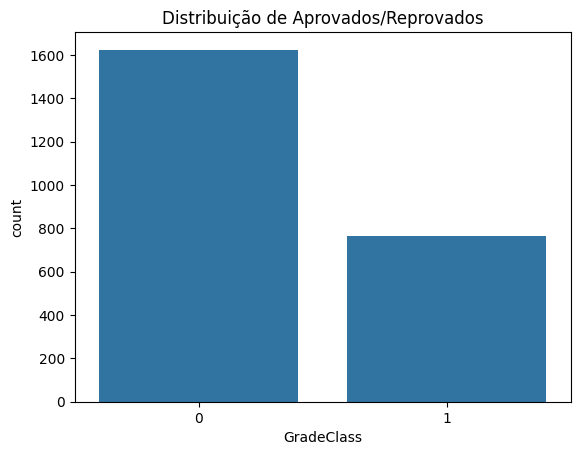

In [5]:
# Visualizando a variável alvo (GradeClass)
sns.countplot(x='GradeClass', data=df_train)
plt.title('Distribuição de Aprovados/Reprovados')
plt.show()


# 4. Separação das variáveis (features e target)

In [6]:
X_train = df_train.drop(['StudentID', 'GPA', 'GradeClass'], axis=1)
y_train = df_train['GradeClass']

X_test = X_test  # Já está pronto (se os nomes das colunas baterem com X_train)
y_test = y_test.values.ravel()  # Garantir que seja vetor 1D


# 5. Padronização dos dados

Normalizamos os dados para melhorar o desempenho dos modelos.

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 6. Comparação de Modelos (Validação Cruzada no treino)

Testamos diferentes algoritmos para escolher o melhor classificador.

SVM - Acurácias por fold: [0.92275574 0.91649269 0.93933054 0.94560669 0.74058577] | Média: 89.30%
KNN - Acurácias por fold: [0.81419624 0.8434238  0.83054393 0.87238494 0.70711297] | Média: 81.35%
CART - Acurácias por fold: [0.83716075 0.83924843 0.84937238 0.82217573 0.71966527] | Média: 81.35%
NB - Acurácias por fold: [0.92693111 0.91440501 0.93514644 0.92050209 0.71757322] | Média: 88.29%


/tmp/ipython-input-8-1097481859.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(resultados.values(), labels=resultados.keys())


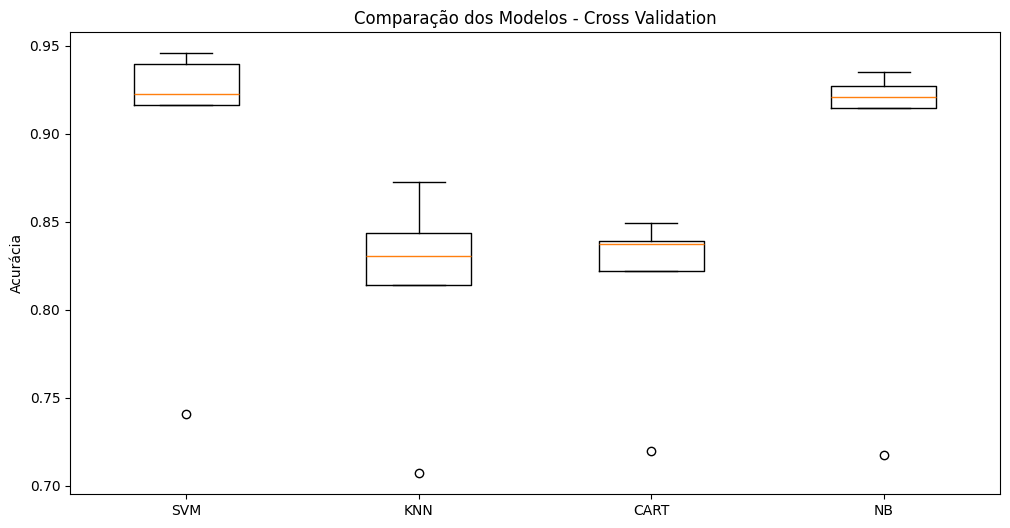

In [8]:
modelos = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "CART": DecisionTreeClassifier(),
    "NB": GaussianNB()
}

resultados = {}

for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring='accuracy')
    resultados[nome] = scores
    print(f"{nome} - Acurácias por fold: {scores} | Média: {scores.mean():.2%}")

plt.figure(figsize=(12,6))
plt.boxplot(resultados.values(), labels=resultados.keys())
plt.title('Comparação dos Modelos - Cross Validation')
plt.ylabel('Acurácia')
plt.show()


# 7. Treinamento e Avaliação do Modelo Final

Treinamos o SVM (modelo escolhido) e avaliamos no conjunto de teste.

In [9]:
model = SVC()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Acurácia: 0.9352818371607515

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       325
           1       0.94      0.86      0.89       154

    accuracy                           0.94       479
   macro avg       0.94      0.91      0.92       479
weighted avg       0.94      0.94      0.93       479

Matriz de Confusão:
 [[316   9]
 [ 22 132]]


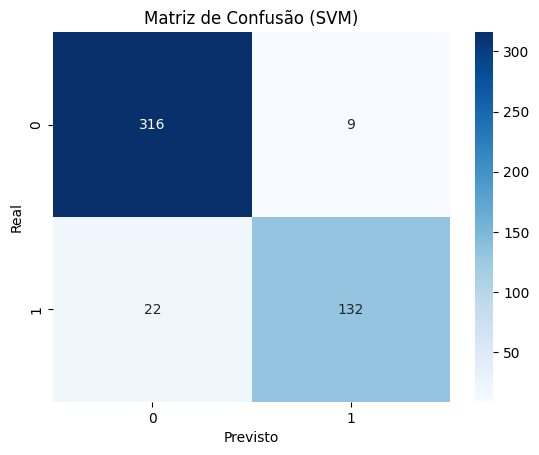

In [10]:
# Visualizando matriz de confusão
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (SVM)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


# 8. Salvando o Modelo Treinado

Exportamos o modelo e o scaler para uso futuro (API Flask).

In [11]:
joblib.dump(model, 'modelo_svm_aprovacao_reprovacao.pkl')
joblib.dump(scaler, 'scaler.pkl')

from google.colab import files
files.download('modelo_svm_aprovacao_reprovacao.pkl')
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 9. Conclusão

O modelo SVM apresentou o melhor desempenho no conjunto de teste, sendo integrado ao MVP para predição de aprovação/reprovação de alunos.